In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

file_path = "instagram_data.csv"  

df = pd.read_csv(file_path) 
print("Loaded Dataset:\n", df)

X = df.index.values.reshape(-1, 1) 
y_likes = df['likes']
y_views = df['views']
y_insights = df['insights']
y_comments = df['comments']

lin_reg_likes = LinearRegression().fit(X, y_likes)
lin_reg_views = LinearRegression().fit(X, y_views)
lin_reg_insights = LinearRegression().fit(X, y_insights)
lin_reg_comments = LinearRegression().fit(X, y_comments)

new_day = np.array([[11]])
likes_pred = lin_reg_likes.predict(new_day)[0]
views_pred = lin_reg_views.predict(new_day)[0]
insights_pred = lin_reg_insights.predict(new_day)[0]
comments_pred = lin_reg_comments.predict(new_day)[0]

print("Predicted values for day 11:")
print("Likes:", math.ceil(likes_pred))
print("Views:", math.ceil(views_pred))
print("Insights:", math.ceil(insights_pred))
print("Comments:", math.ceil(comments_pred))

Loaded Dataset:
    likes  views  insights  comments
0    120   4500        80        15
1    200   6000       120        20
2    310   7500       150        30
3    180   5000       100        25
4    250   6700       130        22
5    140   4800        90        18
6    330   7800       160        35
7    190   5300       110        20
8    220   6200       125        28
9    270   7000       140        32
Predicted values for day 11:
Likes: 270
Views: 6845
Insights: 141
Comments: 32


In [18]:
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   likes     10 non-null     int64
 1   views     10 non-null     int64
 2   insights  10 non-null     int64
 3   comments  10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [20]:
df.isnull().sum()

likes       0
views       0
insights    0
comments    0
dtype: int64

In [21]:
print(df.describe())


            likes        views    insights   comments
count   10.000000    10.000000   10.000000  10.000000
mean   221.000000  6080.000000  120.500000  24.500000
std     69.033003  1161.225406   25.868256   6.570134
min    120.000000  4500.000000   80.000000  15.000000
25%    182.500000  5075.000000  102.500000  20.000000
50%    210.000000  6100.000000  122.500000  23.500000
75%    265.000000  6925.000000  137.500000  29.500000
max    330.000000  7800.000000  160.000000  35.000000


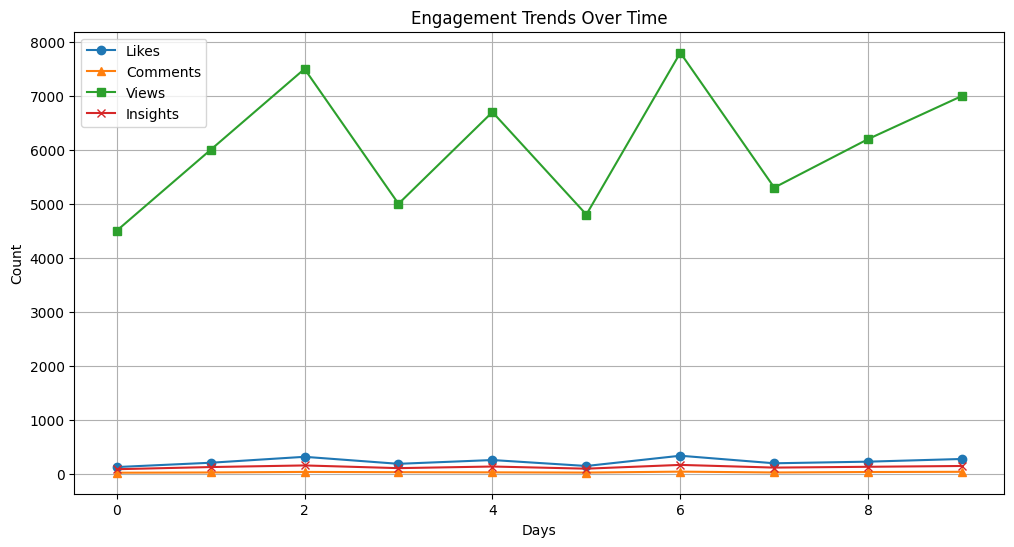

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['likes'],marker='o',linestyle='-',label='Likes')
plt.plot(df.index,df['comments'],marker='^',linestyle='-',label='Comments')
plt.plot(df.index,df['views'],marker='s',linestyle='-',label='Views')
plt.plot(df.index,df['insights'],marker='x',linestyle='-',label='Insights')
plt.xlabel("Days")
plt.ylabel("Count")
plt.title("Engagement Trends Over Time")
plt.legend()
plt.grid()
plt.show()

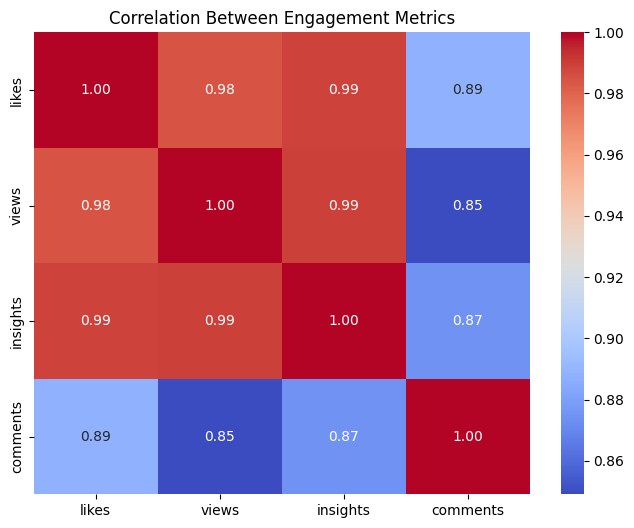

In [23]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Between Engagement Metrics")
plt.show()

In [16]:
%pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


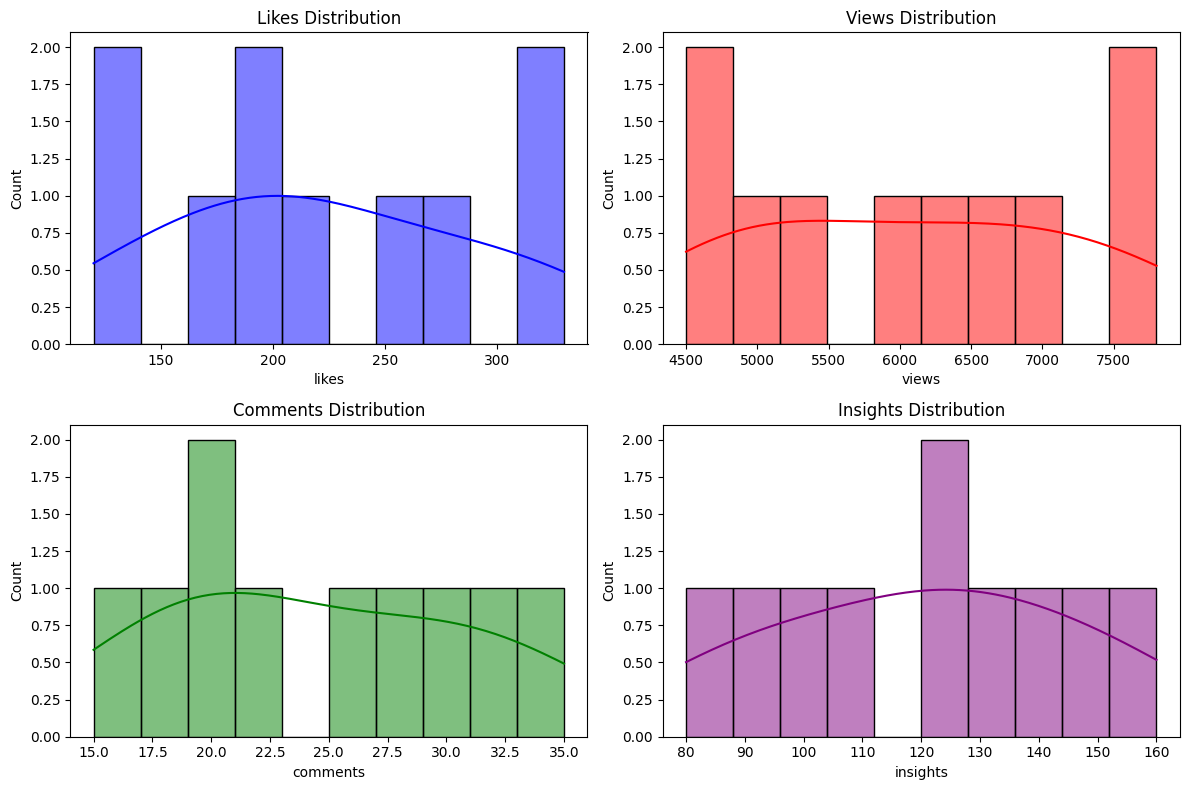

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['likes'], bins=10, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Likes Distribution')

sns.histplot(df['views'], bins=10, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Views Distribution')

sns.histplot(df['comments'], bins=10, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Comments Distribution')

sns.histplot(df['insights'], bins=10, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Insights Distribution')

plt.tight_layout()
plt.show()
